<a href="https://www.kaggle.com/code/niteshk97/stochastic-gradient-descent?scriptVersionId=115926752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-course-data/ion.csv
/kaggle/input/dl-course-data/spotify.csv
/kaggle/input/dl-course-data/forestfires.csv
/kaggle/input/dl-course-data/songs.csv
/kaggle/input/dl-course-data/abalone.csv
/kaggle/input/dl-course-data/concrete.csv
/kaggle/input/dl-course-data/fuel.csv
/kaggle/input/dl-course-data/red-wine.csv
/kaggle/input/dl-course-data/hotel.csv
/kaggle/input/dl-course-data/diamonds.csv
/kaggle/input/dl-course-data/candy.csv
/kaggle/input/dl-course-data/cereal.csv
/kaggle/input/dl-course-data/housing.csv


In the Fuel Economy dataset your task is to predict the fuel economy of an automobile given features like its type of engine or the year it was made.

First load the dataset by running the cell below.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('../input/dl-course-data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


Take a look at the data if you like. Our target in this case is the 'FE' column and the remaining columns are the features.

In [3]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Run the next cell to define the network we'll use for this task.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

2023-01-09 17:58:25.114502: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**1) Add Loss and Optimizer**

Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.


In [5]:
model.compile(
    optimizer='adam',
    loss='mae'
)




**2) Train Model**
Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y

In [6]:
history = model.fit(X, y, batch_size=128, epochs=200)

2023-01-09 17:58:25.343124: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
9/9 [==============================] - 1s 3ms/step - loss: 2.9791
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 1.1555
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7201
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3845
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2596
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1952
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1543
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1173
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0996
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0849
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the training loss.

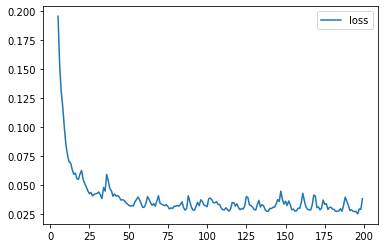

In [7]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();